## *k*-means for color compression

+ 色彩压缩。
+ 用聚类中心的颜色代替自己的颜色。
+ 每一个像素看成是一个三维数值。对长 x 宽这么多像素进行聚类。

In [23]:
import numpy as np

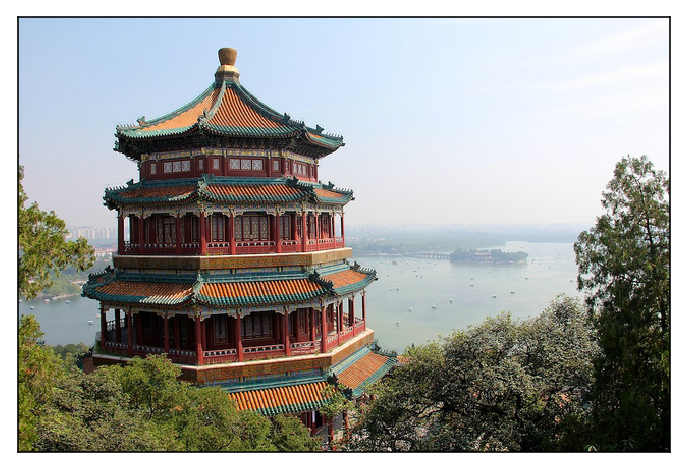

In [30]:
# 需要安装 pillow 图像程序包

from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)
plt.show()

In [31]:
china.shape

(427, 640, 3)

In [32]:
data = china / 255.0  # 转换到 [0, 1] 区间
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

每个通道有 27 万个像素。

还可以在颜色空间中对这些像素进行可视化。为了演示方便，这里只使用包含前 10000 像素的子集。

In [33]:
data.shape

(273280, 3)

In [26]:
N = 10
rng = np.random.RandomState(0)
i = rng.permutation(data.shape[0])[:N]
data = data[i]

In [36]:
i

array([101521, 233130, 175683, 112692,   3839, 198617, 109964,  62478,
       105559,  43141])

In [39]:
data[i].T.shape

(3, 10)

In [41]:
R, G, B  = data[i].T

In [42]:
R

array([0.92156863, 0.37647059, 0.48235294, 0.81960784, 0.98823529,
       0.41568627, 0.94901961, 0.87843137, 0.24313725, 0.80784314])

In [10]:
import numpy as np


def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # 随机选择一个子集
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]

    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    # 红色与绿色
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    # 红色与蓝色
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

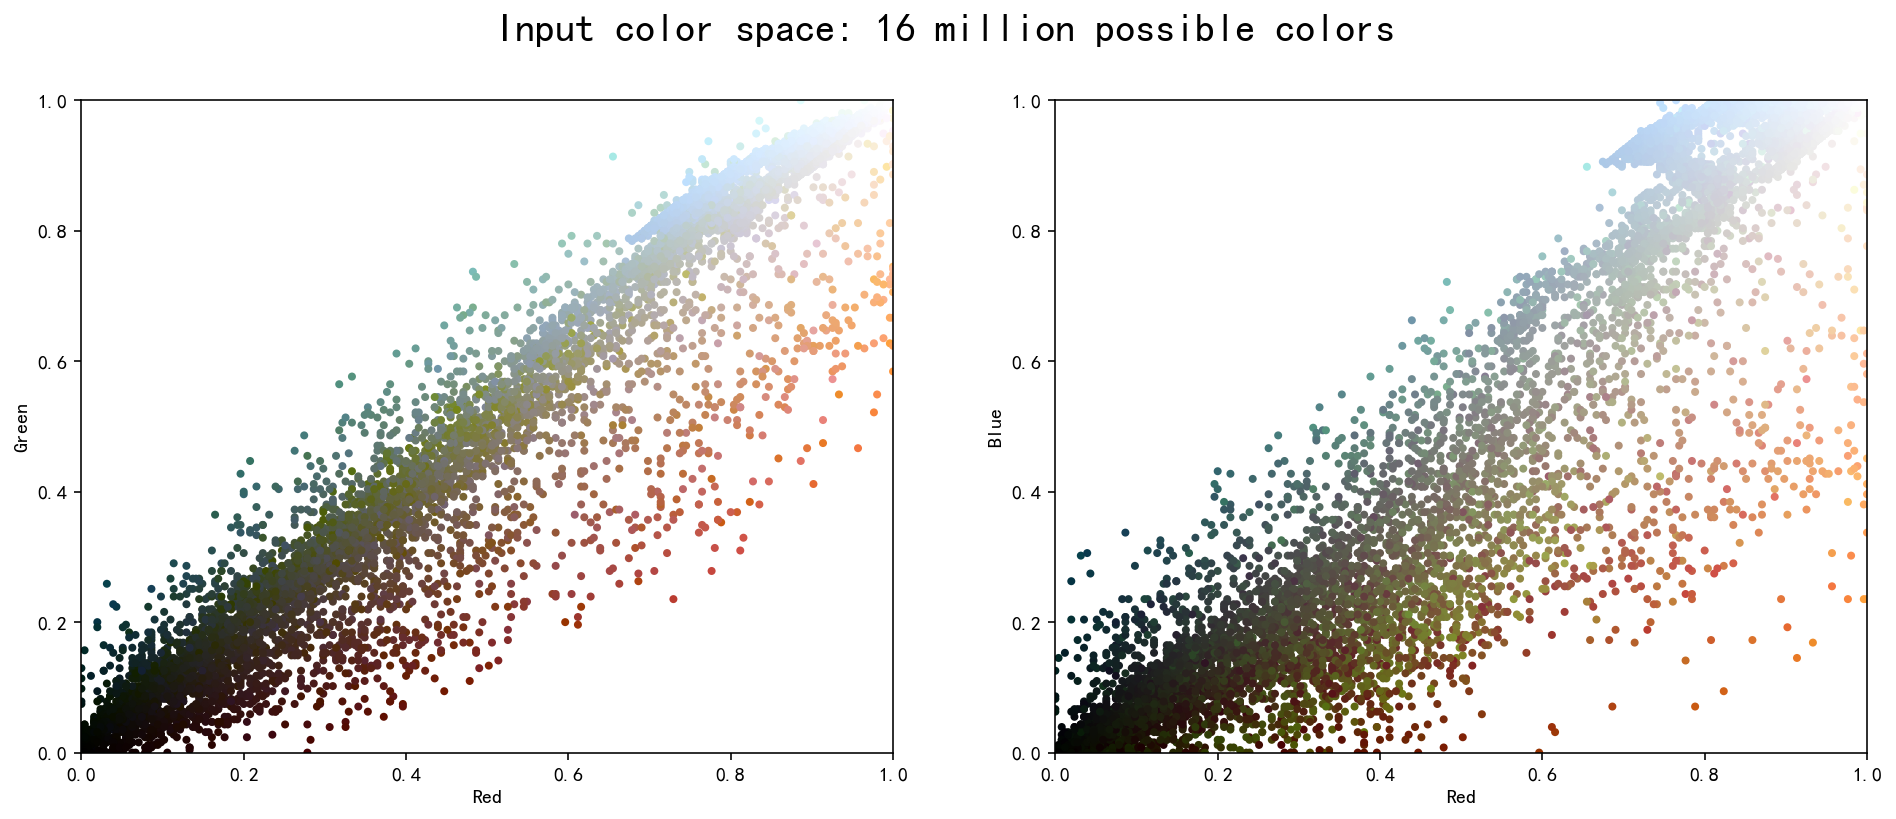

In [46]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [12]:
data.shape

(273280, 3)

用聚类中心的颜色代替自己的颜色。

书上用 16 个颜色，我用 4 个颜色。

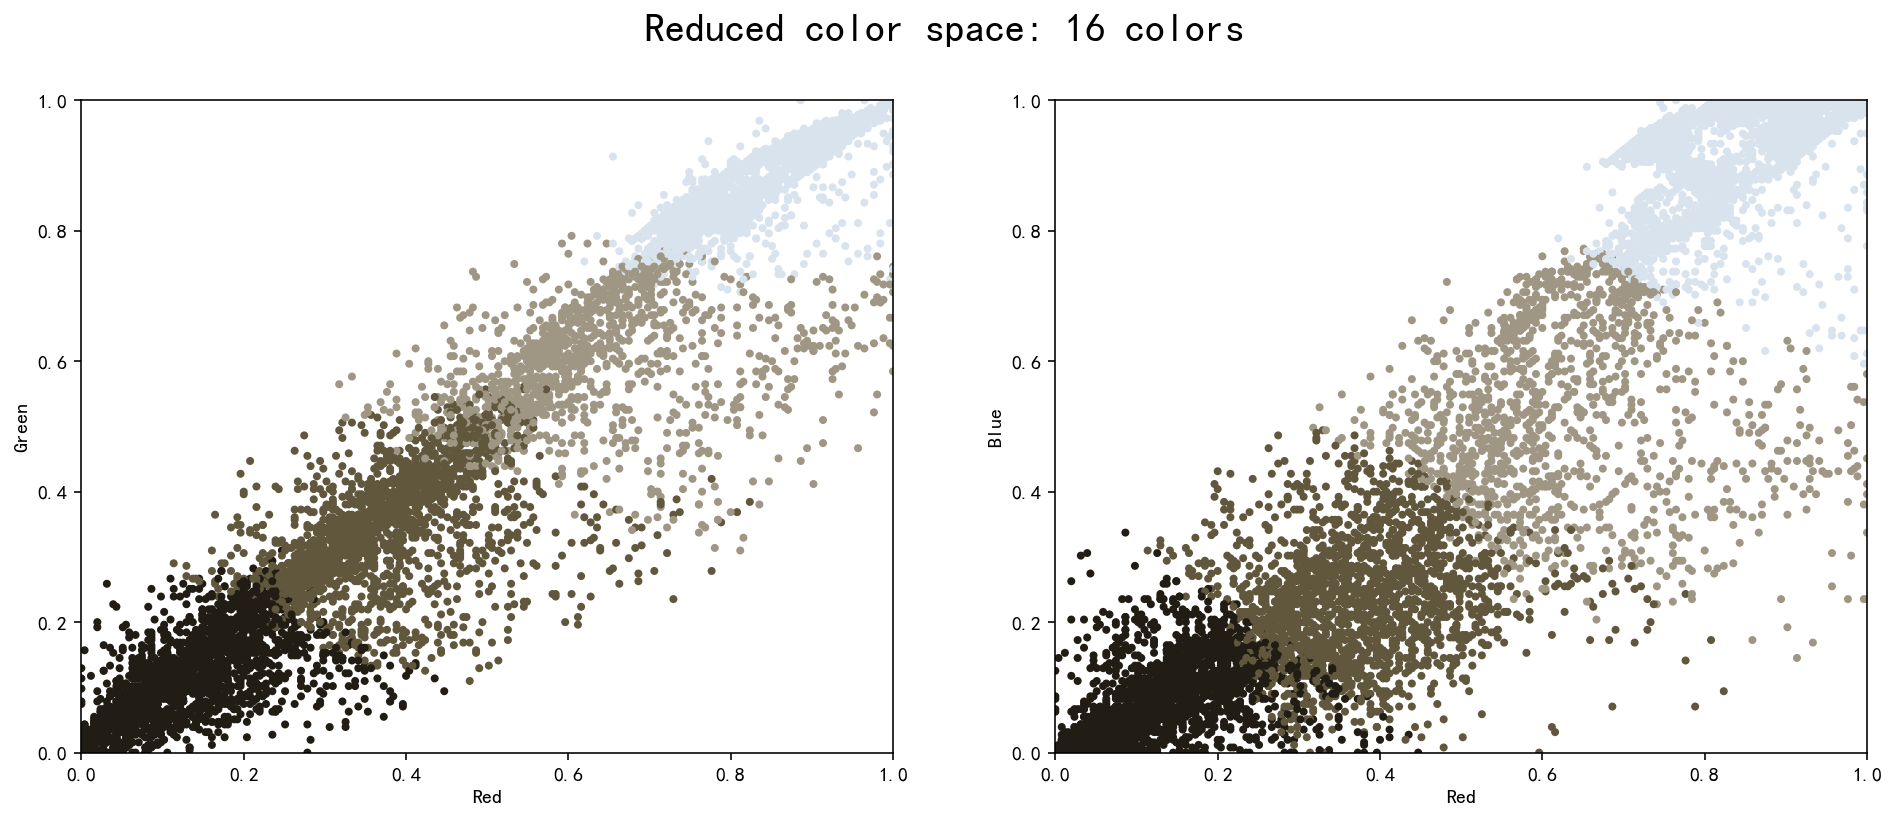

In [62]:
# import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(4)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

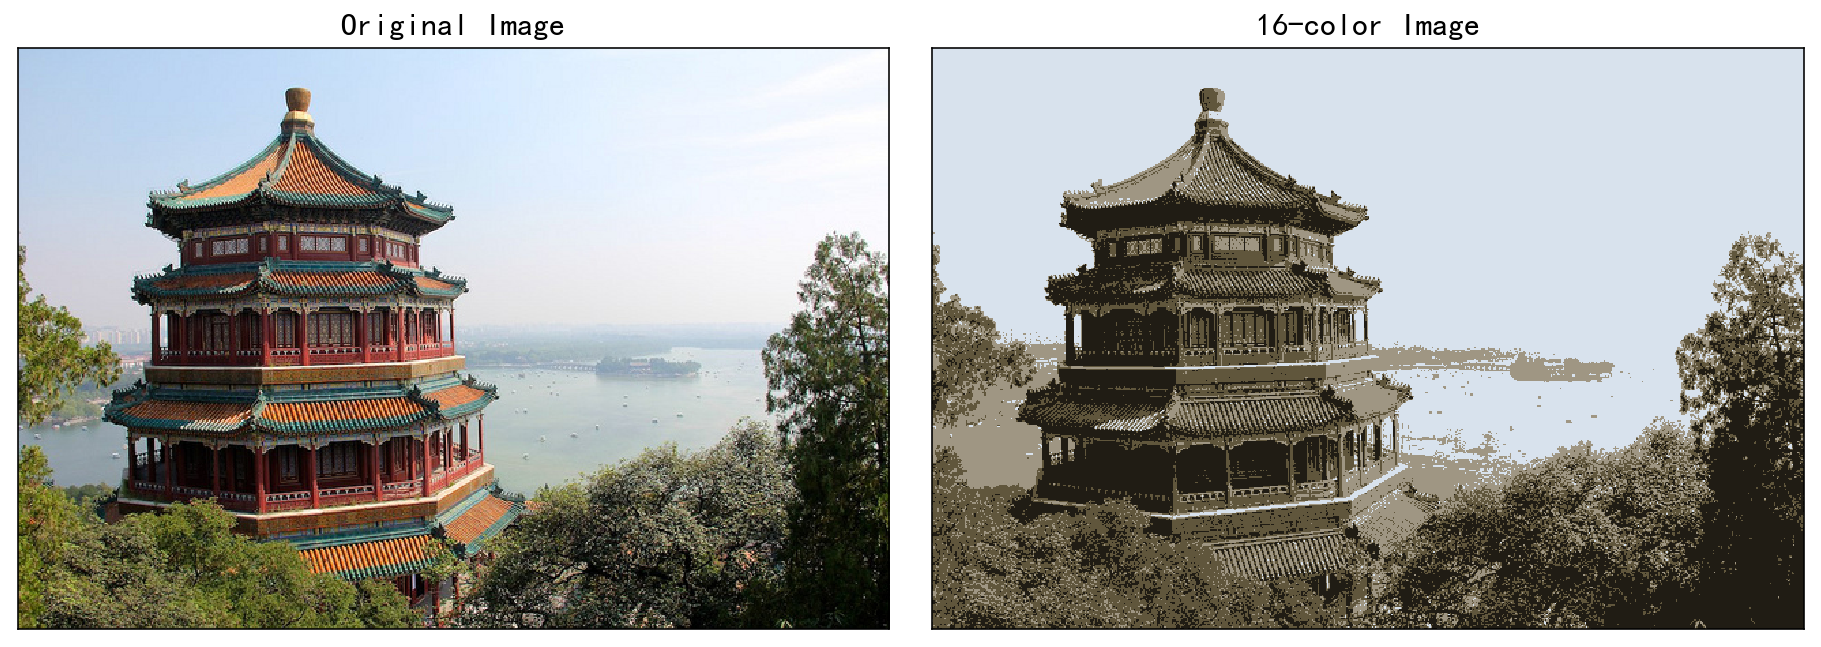

In [63]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(
    1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
# 调整水平间距
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('4-color Image', size=16)
plt.show()

右边这张图只有 4 种颜色。